<a href="https://colab.research.google.com/github/carolina-garay/grupo_32/blob/main/Pr%C3%A1ctico1_Grupo32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
# Trabajo práctico entregable - Parte 1

*Grupo 32*

Integrantes: 
- Garay, Carolina del Valle
- Ormaechea, Sebastián Gabriel
- Ramos, Pablo Nicolás
- Reviglio, Valentín
- Siner, Magalí
             
Introducción:

En el presente documento se exploran y analizan los resultados de la encuesta de salarios 2020 de sysarmy, a fin de tratar los siguientes interrogantes: 

- ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

- ¿Que herramientas (prácticas y teóricas) son útiles para explorar la base, descubrir patrones, asociaciones?

## Exploración de la base de datos

###   Importación de librerías necesarias

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

sns.set_context('talk')

### Lectura del dataset

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df_orig = pd.read_csv(url)
df_orig.shape

(6095, 48)

La base de datos cuenta con 6095 respuestas a la encuesta, donde se consultó por 48 variables diferentes.
A continuación, se exploran las columnas a fin de detectar las variables relevantes para el análisis.

In [3]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   profile_gender                                6095 non-null   object 
 1   profile_age                                   6095 non-null   int64  
 2   work_country                                  6095 non-null   object 
 3   work_province                                 6095 non-null   object 
 4   profile_years_experience                      6095 non-null   float64
 5   work_years_in_company                         6095 non-null   float64
 6   work_years_in_current_position                6095 non-null   float64
 7   work_people_in_charge_of                      6095 non-null   int64  
 8   profile_studies_level                         6095 non-null   object 
 9   profile_studies_level_state                   6095 non-null   o

Seleccionamos las siguientes variables como relevantes:

Variable RESPUESTA:

    - Salario mensual neto :'salary_monthly_NETO'. Tipo: cuantitativa
    
Variables EXPLICATIVAS:
    
    - Lenguajes de programación utilizados: 'tools_programming_languages'. Tipo: categórica
    
    - Nivel de estudios: 'profile_studies_level'. Tipo: categórica
    
    - Años de experiencia: 'profile_years_experience'. Tipo: cuantitativa
    
    - Rol de trabajo: 'work_role'. Tipo: categórica
    
    - Tipo de contrato de trabajo: 'work_contract_type'. Tipo: categórica 
    
*Nota: El tipo de variable se corroboró mediante la inspección de la columna con el método "df["column_name"].unique()"

### Selección de las filas relevantes para los análisis. 

In [4]:
s_neto= 'salary_monthly_NETO'

# Cálculo de medidas de centralización
max_salario = df_orig[s_neto].max()
med_salario = df_orig[s_neto].median()
mod_salario = df_orig[s_neto].mode()

print("Salario máximo NETO:",max_salario, "$ARS")
print("Mediana del salario NETO:",med_salario, "$ARS")
print("Moda del salario NETO:", str(mod_salario),"$ARS") 

Salario máximo NETO: 2080000.0 $ARS
Mediana del salario NETO: 78000.0 $ARS
Moda del salario NETO: 0    80000.0
dtype: float64 $ARS


In [5]:
#Cálculo de frecuencias para diferentes salarios y rangos de salario

print("Cantidad de personas con salarios igual a 80mil $ARS (Moda):",len(df_orig[df_orig[s_neto]==80000])) 
print("Cantidad de personas con salarios igual a 100mil $ARS:",len(df_orig[df_orig[s_neto]==100000]))
print("Cantidad de personas con salarios igual a 200mil $ARS:", len(df_orig[df_orig[s_neto]==200000]))
print("Cantidad de personas con salarios entre 60mil y 70mil $ARS:", len(df_orig[(df_orig[s_neto] >=60000) & (df_orig[s_neto] <=70000)]))
print("Cantidad de personas con salarios entre 70mil y 80mil $ARS:", len(df_orig[(df_orig[s_neto] >70000) & (df_orig[s_neto] <=80000)]))
print("Cantidad de personas con salarios entre 80mil y 90mil $ARS:", len(df_orig[(df_orig[s_neto] >80000) & (df_orig[s_neto] <=90000)]))
print("Cantidad de personas con salarios entre 90mil y 1000mil $ARS:", len(df_orig[(df_orig[s_neto] >90000) & (df_orig[s_neto] <=100000)]))
print("Cantidad de personas con salarios entre 100mil y 200mil $ARS:", len(df_orig[(df_orig[s_neto] >100000) & (df_orig[s_neto] <=200000)]))
print("Cantidad de personas con salarios entre 200mil y 300mil $ARS:", len(df_orig[(df_orig[s_neto] >200000) & (df_orig[s_neto] <=300000)]))
print("Cantidad de personas con salarios entre 300mil y 400mil $ARS:", len(df_orig[(df_orig[s_neto] >300000) & (df_orig[s_neto] <=400000)]))
print("Cantidad de personas con salarios entre 400mil y 500mil $ARS:", len(df_orig[(df_orig[s_neto] >400000) & (df_orig[s_neto] <=500000)]))
print("Cantidad de personas con salarios entre 500mil y 600mil $ARS:", len(df_orig[(df_orig[s_neto] >500000) & (df_orig[s_neto] <=600000)]))
print("Cantidad de personas con salarios entre 600mil y 700mil $ARS:", len(df_orig[(df_orig[s_neto] >600000) & (df_orig[s_neto] <=700000)]))
print("Cantidad de personas con salarios entre 700mil y 800mil $ARS:", len(df_orig[(df_orig[s_neto] >700000) & (df_orig[s_neto] <=800000)]))
print("Cantidad de personas con salarios entre 800mil y 900mil $ARS:", len(df_orig[(df_orig[s_neto] >800000) & (df_orig[s_neto] <=900000)]))
print("Cantidad de personas con salarios entre 900mil y 1millón $ARS:", len(df_orig[(df_orig[s_neto] >900000) & (df_orig[s_neto] <=1000000)]))

Cantidad de personas con salarios igual a 80mil $ARS (Moda): 149
Cantidad de personas con salarios igual a 100mil $ARS: 139
Cantidad de personas con salarios igual a 200mil $ARS: 41
Cantidad de personas con salarios entre 60mil y 70mil $ARS: 648
Cantidad de personas con salarios entre 70mil y 80mil $ARS: 621
Cantidad de personas con salarios entre 80mil y 90mil $ARS: 542
Cantidad de personas con salarios entre 90mil y 1000mil $ARS: 514
Cantidad de personas con salarios entre 100mil y 200mil $ARS: 1341
Cantidad de personas con salarios entre 200mil y 300mil $ARS: 154
Cantidad de personas con salarios entre 300mil y 400mil $ARS: 73
Cantidad de personas con salarios entre 400mil y 500mil $ARS: 41
Cantidad de personas con salarios entre 500mil y 600mil $ARS: 17
Cantidad de personas con salarios entre 600mil y 700mil $ARS: 5
Cantidad de personas con salarios entre 700mil y 800mil $ARS: 6
Cantidad de personas con salarios entre 800mil y 900mil $ARS: 7
Cantidad de personas con salarios entre 

Considerando la distribución de salarios, se decidió filtrar la base de datos mediante un valor mínimo y un valor máximo. 

El valor mínimo se estableció en 54.207 `$`ARS que corresponde a la Canasta Básica Total (CBT) en diciembre de 2020 (Fte:INDEC). Se considera que valores por debajo de la CBT posiblemente correspondan a trabajos part-time o ad-honorem, los cuales no nos interesa que se incorporen al análisis. En el apéndice se desarrolla un breve análisis de los contratos part_time. 

El valor máximo se estableció en 542.070 `$`ARS, correspondiente a 10 CBT. Este valor parece adecuado considerando que en el análisis previo se observa una fuerte caída en la cantidad de entrevistados a partir de salarios de 500.000 `$`ARS. Cabe comentar que el valor máximo corresponde al cuartil de 75% mas 8 veces el intercuartil. 

In [6]:
# Cálculo de la posición del valor 542.070 (10 CBT) sobre el cuartil de 75%
q1 = df_orig[s_neto].quantile(0.25)
q3 = df_orig[s_neto].quantile(0.75)
iqr = q3 - q1
n= (542070 - q3)/iqr 
n

7.998349229640499

In [7]:
# Filtrado de la base de datos original (df_orig) y generación de la nueva base de datos (df_new)
df_new=  df_orig[(df_orig[s_neto] > 54207) & (df_orig[s_neto] < 542070)]

# Reviso si hay filas duplicadas
df_new.duplicated().any() # Si, hay filas duplicadas, ya que aparece True.

# Lo siguiente  me permite observar ambas filas de cada fila duplicada.
df_new[df_new.duplicated(keep=False)]

# Elimino las filas duplicadas
df_final = df_new.drop_duplicates().reset_index()

# Convierto variables cualitativas de interés de tipo "objeto" a tipo "categórico" para reducir uso de memoria
df_final['profile_studies_level'] = df_final['profile_studies_level'].astype("category")
df_final['work_role'] = df_final['work_role'].astype("category")
df_final['work_contract_type'] = df_final['work_contract_type'].astype("category")

# Calculo estadísticas descriptivas de la nueva base de datos
df_final[s_neto].describe().apply(lambda s: '{0:.1f}'.format(s))  

count      4159.0
mean     110284.5
std       66758.0
min       54310.0
25%       73000.0
50%       91000.0
75%      120000.0
max      535000.0
Name: salary_monthly_NETO, dtype: object

Text(0.5, 1.0, 'Base de datos procesada')

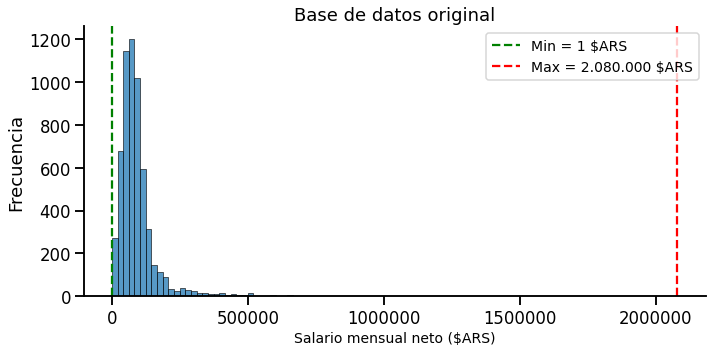

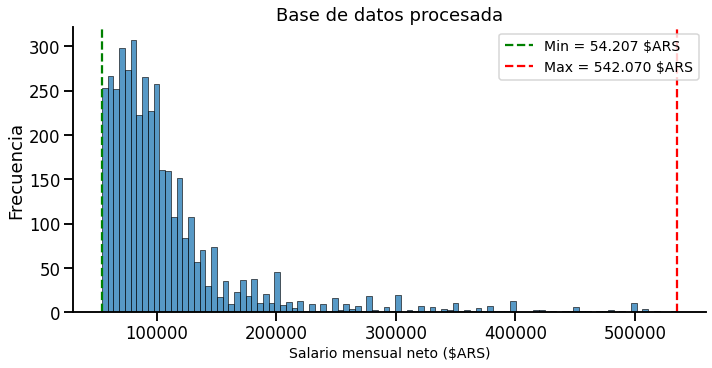

In [8]:
# Comparación gráfica de las bases de datos

g=sns.displot(df_orig[s_neto], aspect=2, bins=100) 
g.refline(x=df_orig[s_neto].min(), color='green', linestyle='--', label="Min = 1 $ARS")
g.refline(x=df_orig[s_neto].max(), color='red', linestyle='--', label="Max = 2.080.000 $ARS")
plt.legend(loc='upper right', fontsize = 14)
plt.ticklabel_format(style='plain')
plt.ylabel("Frecuencia")
plt.xlabel('Salario mensual neto ($ARS)', fontsize=14)
plt.title("Base de datos original")
plt.tight_layout()

m=sns.displot(df_final[s_neto], aspect=2, bins=100) 
m.refline(x=df_final[s_neto].min(), color='green', linestyle='--', label="Min = 54.207 $ARS")
m.refline(x=df_final[s_neto].max(), color='red', linestyle='--', label="Max = 542.070 $ARS")
plt.legend(loc='upper right', fontsize = 14)
plt.ticklabel_format(style='plain')
plt.ylabel("Frecuencia")
plt.xlabel('Salario mensual neto ($ARS)',fontsize=14)
plt.title("Base de datos procesada")

La nueva base de datos conserva una alta proporción de los datos totales de la encuesta (68%), descartando valores extremos mínimos y máximos, y valores duplicados. Se observa en la gráfica de la base de datos limpia, que la mayor proporción de los encuestados declara un salario en torno a los 100.000 $ARS.

## Análisis de lenguajes de programación

Se realizó un análisis de los salarios en función del lenguaje de programación utilizado por los encuestados. El objetivo fue responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

In [9]:
# Selecciono las columnas relevantes
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

# Genero un nuevo dataframe con las columnas relevantes y elimino los valores NaN

df2 = df_final[relevant_columns]
df2 = df2[df2['salary_monthly_NETO'].notna()]
df2 = df2.reset_index(drop=True) # Este método permite indexar desde cero
df2.tools_programming_languages[:5]

0                             HTML, Javascript, Python
1                                              Ninguno
2    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
3               CSS, HTML, Javascript, SQL, TypeScript
4                                           Javascript
Name: tools_programming_languages, dtype: object

**A continuación se separan los lenguajes de programación y se cuenta la frecuencia con la que aparecen dichos lenguajes.**

In [10]:
# Se convierten las cadenas de texto (strings) de la columna lenguajes de programación a una lista de strings.
# Se remueve el string 'ninguno de los anteriores', los espacios y las comas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remoción de la opción 'other'
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Se separan los string en una lista de items
  # Se remueven los espacios y comas de cada item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Se crea una nueva columna con la lista de lenguajes
df2.loc[:, 'cured_programming_languages'] = df2.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Se REPLICA cada fila del dataframe por cada lenguaje de programación mencionado en la respuesta 
df_lang = df2.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df2[relevant_columns])\
    .rename(columns={0: 'programming_language'})
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
0,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
0,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,ninguno,Ninguno,127000.0,[ninguno]
2,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


**En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces.**

    Lenguaje de programación  Frecuencia
0                 javascript        1711
1                        sql        1483
2                       html        1216
3                     python        1130
4                       java        1074
..                       ...         ...
158                  mongodb           1
159                    boomi           1
160                     dell           1
161                      x++           1
162                infobasic           1

[163 rows x 2 columns]


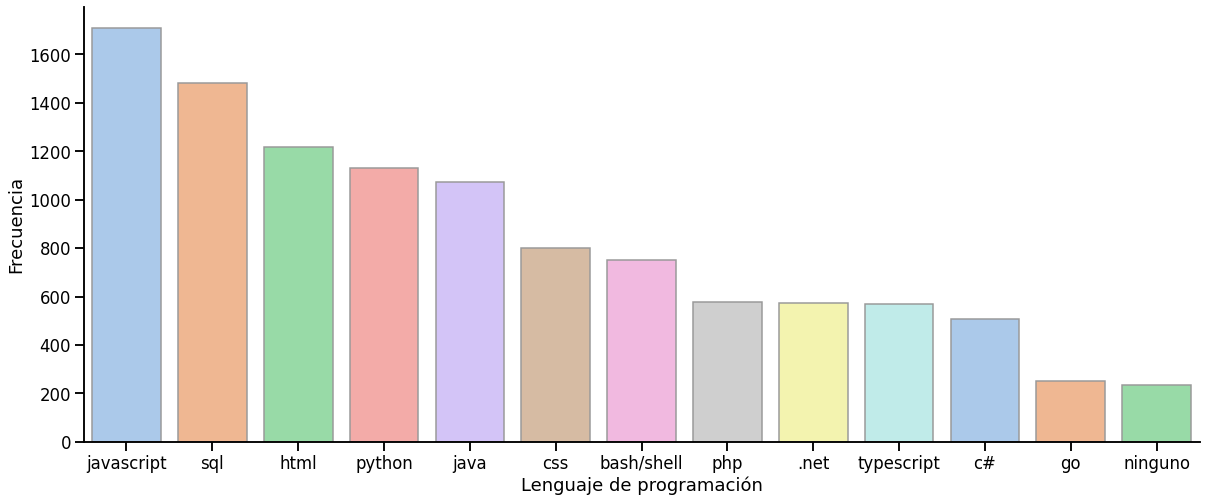

In [11]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Lenguaje de programación', 'programming_language': 'Frecuencia'})
print(language_count)

# Consideramos unicamente como lenguajes populares aquellos que tengan más del 1.5% de votos. Mismo criterio que las PASO
required_votes = language_count.Frecuencia.sum() * 0.015
language_count = language_count[language_count.Frecuencia > required_votes]

plt.figure(figsize=(20,8))
sns.barplot(x="Lenguaje de programación", y="Frecuencia" , palette="pastel", edgecolor=".6", data=language_count)
sns.despine()


La gráfica precedente muestra los lenguajes de programación más populares considerando su frecuencia en la base de datos. Se destaca la superioridad de Javascript, seguido de SQL y html.

### Filtrado de lenguajes relevantes

**El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `popular_languages`.**

In [12]:
# Utilizamos la columna de lenguajes del dataframe ya filtrado, para obtener la lista de lenguajes populares 
popular_languages = language_count["Lenguaje de programación"] 
filtered_df_lang = df_lang[df_lang.programming_language.isin(popular_languages)]
filtered_df_lang = filtered_df_lang[['programming_language', 'salary_monthly_NETO']]

In [13]:
# Calculamos los valores de la base de datos final sobre lenguajes de programación
filtered_df_lang["salary_monthly_NETO"].describe().apply(lambda s: '{0:.1f}'.format(s)) 
# La función apply se usó para especificar el número de decimales

count     10881.0
mean     113720.6
std       70089.9
min       54310.0
25%       74655.0
50%       93000.0
75%      122000.0
max      535000.0
Name: salary_monthly_NETO, dtype: object

**Luego del filtrado, buscamos responder que tan probable es tener un sueldo mayor a la media, dada la elección de un determinado lenguaje.**

In [14]:
salary_mean = filtered_df_lang.salary_monthly_NETO.mean()
print("A continuación se lista el porcentaje de personas que ganan más de: {} $ARS (media)".format('%.1f'%salary_mean))
for language in popular_languages:
    specific_lang_df = filtered_df_lang[filtered_df_lang.programming_language == language]
    specific_lang_and_higher_mean = specific_lang_df[specific_lang_df.salary_monthly_NETO > salary_mean]
    print("El {}% de las personas que programan en {} ganan más de la media".format('%.1f'% ((len(specific_lang_and_higher_mean)/len(specific_lang_df))*100), 
                                                                                    language))


A continuación se lista el porcentaje de personas que ganan más de: 113720.6 $ARS (media)
El 30.8% de las personas que programan en javascript ganan más de la media
El 27.2% de las personas que programan en sql ganan más de la media
El 27.1% de las personas que programan en html ganan más de la media
El 34.3% de las personas que programan en python ganan más de la media
El 33.5% de las personas que programan en java ganan más de la media
El 26.3% de las personas que programan en css ganan más de la media
El 33.9% de las personas que programan en bash/shell ganan más de la media
El 32.0% de las personas que programan en php ganan más de la media
El 28.3% de las personas que programan en .net ganan más de la media
El 34.2% de las personas que programan en typescript ganan más de la media
El 27.0% de las personas que programan en c# ganan más de la media
El 49.4% de las personas que programan en go ganan más de la media
El 23.4% de las personas que programan en ninguno ganan más de la med

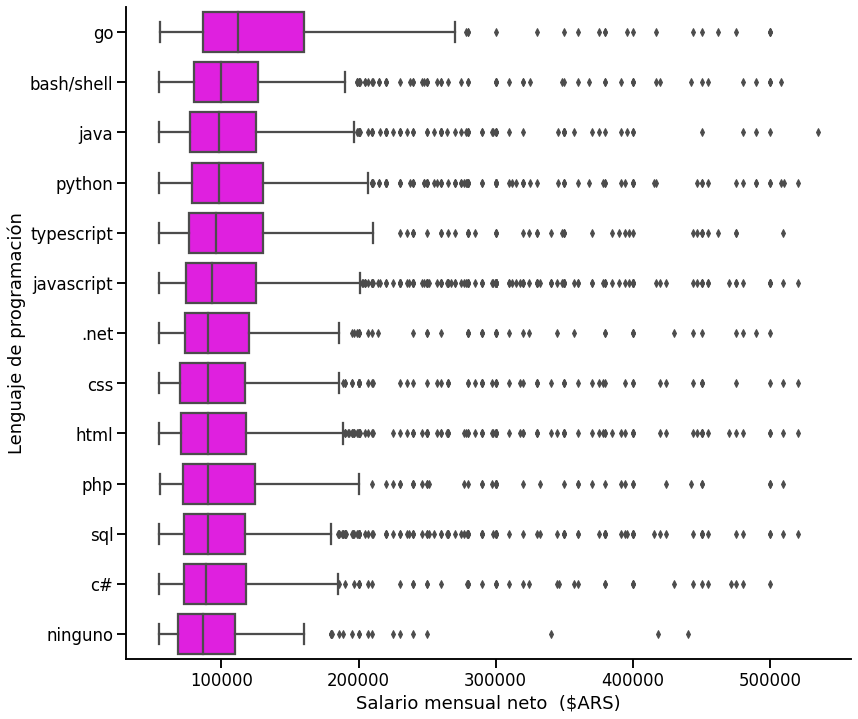

In [15]:
# Graficamos la distribución de los salarios para lenguaje de programación
order= filtered_df_lang.groupby('programming_language')[s_neto].median().sort_values(ascending=False).index #Esto es para que el gráfico ordene por medianas
plt.figure(figsize=(13, 12))
sns.boxplot(data=filtered_df_lang, x=s_neto, y='programming_language',
                color='magenta', order= order)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Salario mensual neto  ($ARS)")
plt.ylabel("Lenguaje de programación")
sns.despine()

La gráfica boxplot precedente, ordena los lenguajes de programación en forma decreciente por su mediana, y describe las respectivas distribuciones de salarios. Los bigotes ubicados a la derecha, marcan los valores correspondientes a 1,5 intercuartiles por encima del percentil 75, dejando a la derecha una importante cantidad de valores atípicos.  

### Conclusiones sobre el análisis de los lenguajes de programación
Los análisis precedentes revelan que aquellos que utilizan el lenguaje de programación "Go", son los que tienen mayor probabilidad (49,4%) de ganar un salario por encima de la media de 113.720 $ARS. En un lejano segundo (34,3%) y tercer (34,2%) puesto se encuentran aquellos que programan con Python y Typescript respectivamente. 
Por otra parte, es interesante observar en la gráfica que, independientemente del lenguaje de programación utilizado, una importante cantidad de programadores logran pactar salarios muy por encima de la media (outliers). 

##  Análisis de densidad conjunta, asociación, densidad condicional y densidad conjunta condicional.

Para estos análisis se contemplan el resto de las variables explicativas consideradas inicialmente: 

    - Nivel de estudios: 'profile_studies_level'. Tipo: categórica
    
    - Años de experiencia: 'profile_years_experience'. Tipo: cuantitativa
    
    - Rol de trabajo: 'work_role'. Tipo: categórica

## a) Densidad conjunta

La densidad conjunta es la distribución de probabilidad que forman dos o más variables aleatorias cuando sus realizaciones se producen simultáneamente. Dicho de otro modo, la densidad o probabilidad conjunta es una medida estadística que indica la probabilidad de que dos sucesos ocurran al mismo tiempo. 

Para el caso de nuestra base de datos, analizaremos la probabilidad conjunta del género y el nivel de estudio mediante una tabla de contingencia.

In [16]:
df_final.profile_studies_level.value_counts()

Universitario    2880
Terciario         719
Posgrado          275
Secundario        262
Doctorado          18
Posdoctorado        3
Primario            2
Name: profile_studies_level, dtype: int64

In [17]:
## Obtención de tabla de contingencia

pd.crosstab(index=df_final.profile_gender, columns=df_final.profile_studies_level, margins=True, margins_name= "Subtotal")

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario,Subtotal
profile_gender,,,,,,,,
Hombre,13,3,211,2,246,631,2476,3582
Mujer,4,0,63,0,15,85,393,560
Otros,1,0,1,0,1,3,11,17
Subtotal,18,3,275,2,262,719,2880,4159


In [18]:
#Cálculo de probabilidad conjunta
pd.crosstab(index=df_final.profile_gender, 
            columns=df_final.profile_studies_level).apply(lambda r: r/len(df_final) *100,
                                              axis=1)        

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,0.312575,0.072133,5.073335,0.048088,5.914883,15.171916,59.533542
Mujer,0.096177,0.000000,1.514787,0.000000,0.360664,2.043761,9.449387
Otros,0.024044,0.000000,0.024044,0.000000,0.024044,0.072133,0.264487


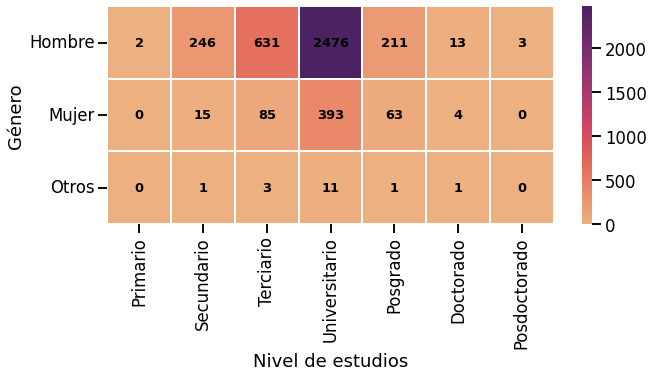

In [19]:
# Mapa de calor para representar la tabla de contingencia anterior 
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig = plt.figure(figsize=(10,4))
exp = pd.crosstab(df_final.profile_gender,
                  df_final.profile_studies_level)[sorted_studies_levels]
sns.heatmap(exp, annot=True,linewidths = .9, fmt='g', cmap = 'flare',
            annot_kws={'size':13,'weight':'bold','color':'black'})
plt.xticks(rotation=90)
plt.xlabel("Nivel de estudios")
plt.yticks(rotation=0)
plt.ylabel("Género");

---
Conclusión: Mediante el mapa de calor es posible observar que la mayor cantidad de personas con estudios universitarios y de posgrado corresponden al género Hombre. En la tabla de probabilidades conjuntas se oberva que:

    - Probabilidad de que una mujer tenga estudios universitarios: 9,4%
    - Probabilidad de que un hombre tenga estudios universitarios: 59,5%
    - Probabilidad de que una mujer tenga estudios de posgrado: 1,5%
    - Probabilidad de que un hombre tenga estudios de posgrado: 5%
---


## b) Asociación

La asociación es una medida que determina el grado de vinculación entre dos variables. Para variables cuantitativas, las medidas de asociación más utilizadas son la covarianza y el coeficiente de correlación de Pearson.

Aquí plantearemos una asociación de salario bruto y neto, y compararemos la base de datos original con la final. 


In [20]:
# Inicialmente hacemos un filtrado de la base de datos según diferentes criterios
# No utilizamos remoción por quartiles porque ya establecimos los límites mínimos y máximos al comienzo del documento

df_finalAsoc = df_final[df_final['salary_monthly_BRUTO'] <= 677000] # 677000 $ARS es el valor estimado del bruto máximo, considerando que el bruto es un 20% más que el neto.
df_finalAsoc = df_finalAsoc[df_finalAsoc['salary_monthly_BRUTO'] >= 67700] # 67700 $ARS es el valor estimado del bruto mínimo, considerando que el bruto es un 20% más que el neto.
df_finalAsoc = df_finalAsoc[df_finalAsoc['salary_monthly_NETO'].notna()] # Conservo filas sin valor NaN en columna de salario neto
df_finalAsoc = df_finalAsoc[df_finalAsoc['salary_monthly_BRUTO'].notna()] # Conservo filas sin valor NaN en columna de salario bruto
df_finalAsoc = df_finalAsoc[df_finalAsoc['salary_monthly_BRUTO'] >= df_finalAsoc['salary_monthly_NETO']] # Conservo filas donde el salario bruto es mayor al neto 

In [21]:
# Medidas de centralización
mediana_bruto = df_finalAsoc['salary_monthly_BRUTO'].median()
media_bruto = df_finalAsoc['salary_monthly_BRUTO'].mean()

mediana_neto = df_finalAsoc['salary_monthly_NETO'].median()
media_neto = df_finalAsoc['salary_monthly_NETO'].mean()

print(f"La mediana del salario bruto es {mediana_bruto} y la media es {media_bruto}")
print(f"La mediana del salario neto es {mediana_neto} y la media es {media_neto}")

La mediana del salario bruto es 120000.0 y la media es 145371.02445835463
La mediana del salario neto es 93000.0 y la media es 111339.82098364842


In [22]:
# Medidas de asociación
import numpy as np 

matcov=np.cov(df_finalAsoc.salary_monthly_BRUTO,df_finalAsoc.salary_monthly_NETO)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corrAsoc=np.corrcoef(df_finalAsoc.salary_monthly_BRUTO,df_finalAsoc.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corrAsoc,'\n')

print('La correlación entra ambas variables para la base datos limpia es: ',corrAsoc[0,1],'\n')

matriz de varianza covarianza: 
 [[7.10980515e+09 5.21245265e+09]
 [5.21245265e+09 4.21846983e+09]] 

matriz de correlaciones: 
  [[1.        0.9517783]
 [0.9517783 1.       ]] 

La correlación entra ambas variables para la base datos limpia es:  0.9517783022092415 



In [23]:
# Cálculo de correlación para la base de datos original
df_origAsoc = df_orig[df_orig['salary_monthly_NETO'].notna()] # Conservo filas sin valor NaN en columna de salario neto
df_origAsoc = df_origAsoc[df_origAsoc['salary_monthly_BRUTO'].notna()] # Conservo filas sin valor NaN en columna de salario bruto

corr=np.corrcoef(df_origAsoc.salary_monthly_BRUTO,df_origAsoc.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('La correlación entra ambas variables para la base datos original es: ',corr[0,1],'\n')

matriz de correlaciones: 
  [[1.         0.83333512]
 [0.83333512 1.        ]] 

La correlación entra ambas variables para la base datos original es:  0.8333351176300585 



In [24]:
#Cálculo de la pendiente de la regresión
datos_x = df_finalAsoc[["salary_monthly_NETO"]]
x_train = np.array(datos_x)
y_train = df_finalAsoc['salary_monthly_BRUTO'].values

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
print("Pendiente de la regresión:", regr.coef_)

Pendiente de la regresión: [1.23562639]


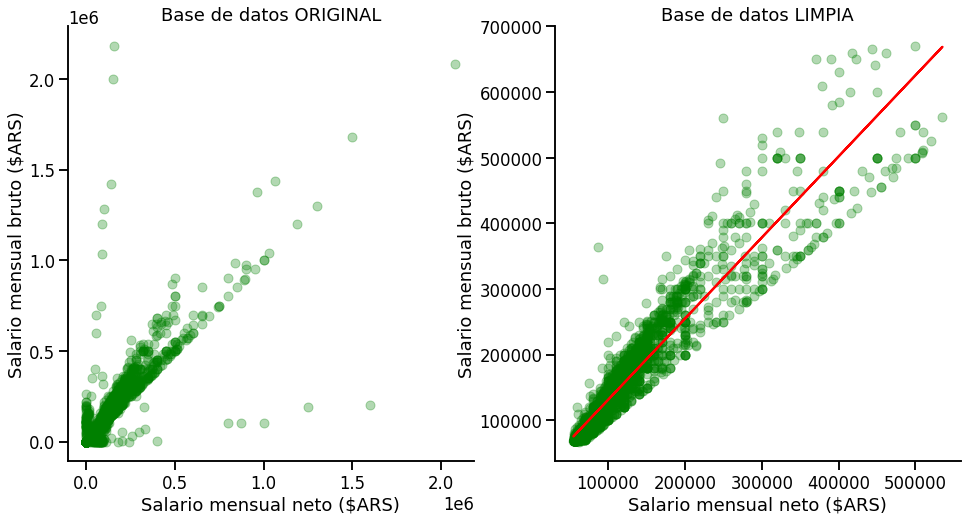

In [25]:
# Gráfico la asociación de variables comparando bases de datos
fig, axes= plt.subplots(ncols=2, figsize=(16, 8))
plt.plot(x_train,y_pred, color='red')
g = sns.regplot(y=df_origAsoc['salary_monthly_BRUTO'],
                 x=df_origAsoc['salary_monthly_NETO'], scatter_kws={'alpha':0.3}, fit_reg=False, ax=axes[0], color='g')
g.set(xlabel="Salario mensual neto ($ARS)", ylabel= "Salario mensual bruto ($ARS)", title="Base de datos ORIGINAL")
m = sns.regplot(y=df_finalAsoc['salary_monthly_BRUTO'],
                 x=df_finalAsoc['salary_monthly_NETO'], scatter_kws={'alpha':0.3}, fit_reg=False, ax=axes[1], color='g')
m.set(xlabel="Salario mensual neto ($ARS)", ylabel= "Salario mensual bruto ($ARS)", title="Base de datos LIMPIA")

sns.despine()

Conclusión: La limpieza de la base de datos mejoró sustancialmente la correlación entre las variables salario neto y bruto (0.952) versus la base de datos original (0.833). El elemento fundamental fue la eliminación de valores de salario bruto mayores a 677.000 $ARS. Esta limpieza permitiría utilizar indistintamente ambas variables a fines analíticos sobre el resto de las variables explicativas. Sin embargo, el salario neto es una variable más práctica de uso ya que representa el salario efectivo que percibe el programador.

## c) Densidad condicional 

La diferencia entre probabilidad conjunta y probabilidad condicional es que en la probabilidad conjunta, los dos eventos tienen que ocurrir al mismo tiempo, en cambio, la probabilidad condicional se refiere a la probabilidad de que suceda un evento si otro evento ya se ha cumplido.

Para el caso de nuestra base de datos, analizaremos la distribución del salario según el nivel de estudio. La pregunta que densidad condicional que buscaremos responder será ¿Cuál es la probabilidad de ganar un salario mayor a la media, dado que el nivel de estudios alcanzado es de secundario?

In [26]:
# Observamos la frecuencia de cada nivel de estudio en la base de datos
df_final["profile_studies_level"].value_counts()

Universitario    2880
Terciario         719
Posgrado          275
Secundario        262
Doctorado          18
Posdoctorado        3
Primario            2
Name: profile_studies_level, dtype: int64

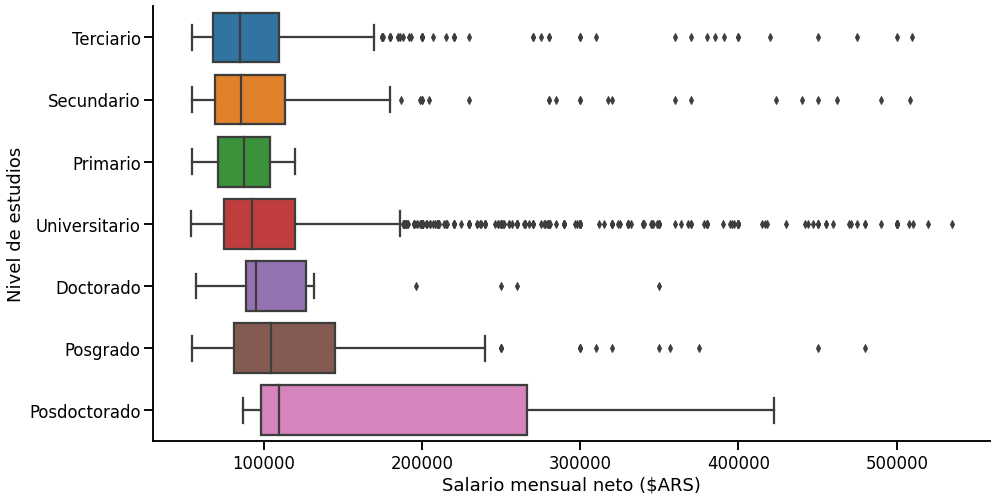

In [27]:
# Mediante un boxplot, analizamos el salario según el nivel de estudio 
order= df_final.groupby('profile_studies_level')[s_neto].median().sort_values().index #Esto es para que el gráfico ordene por medianas
plt.figure(figsize=(15, 8))
g = sns.boxplot(data=df_final, x='salary_monthly_NETO', 
                  y='profile_studies_level', order=order)
g.set(xlabel="Salario mensual neto ($ARS)", ylabel="Nivel de estudios")
sns.despine()

In [28]:
# Finalmente realizamos los cálculos de la probabilidad que responde a la pregunta inicial de Densidad Condicional. 
# ¿Cuál es la probabilidad de ganar un salario mayor a la media, dado que el nivel de estudios alcanzado es de secundario?
df_sec = df_final["profile_studies_level"] == "Secundario"
df_plusmedia = df_final[s_neto] > df_final[s_neto].mean()
prob_secplusmedia = len(df_final[df_sec & df_plusmedia]) / len(df_final[df_final["profile_studies_level"] == "Secundario"])
print("La probabilidad de encontrar un programador que gane un sueldo mayor a la media, dado que alcanzó el nivel secundario, es de ", 
      str(prob_secplusmedia*100), " %")

La probabilidad de encontrar un programador que gane un sueldo mayor a la media, dado que alcanzó el nivel secundario, es de  25.954198473282442  %


Conclusión: Considerando la mediana, se observa un incremento esperable del salario en función del nivel de estudio. En cuanto al interrogante puntual, se encontró que entre los programadores que alcanzaron solo el nivel secundario, solo el 26 % recibe un salario mayor a la media.

## d) Densidad Conjunta Condicional

La densidad conjunta condicional, permite calcular la probabilidad conjunta de dos eventos, dado que ya ha sucedido un tercer evento. 

Para el caso de nuestra base de datos, analizaremos la probabilidad de ganar un salario por encima de la media, teniendo menos de 2 años de experiencia. Esto se analizará solo sobre la categoría Data Scientist, lo cual representará la condición dada inicialmente.


In [29]:
# Inicialmente inspeccionamos las variables cuantitativas
df_final[["profile_years_experience", s_neto]].describe()

,profile_years_experience,salary_monthly_NETO
count,4159.000000,4159.000000
mean,10.156071,110284.475285
std,7.081791,66757.982503
min,0.000000,54310.000000
25%,5.000000,73000.000000
50%,9.000000,91000.000000
75%,15.000000,120000.000000
max,115.000000,535000.000000


In [30]:
# Dado que la variable años de experiencia tiene valores incorrectamente altos, se le realiza un filtrado mediante un corte de 50 años

experience_filtered = df_final["profile_years_experience"][df_final["profile_years_experience"] < 50]
experience_filtered.describe().apply(lambda s: '{0:.2f}'.format(s))

count    4158.00
mean       10.13
std         6.89
min         0.00
25%         5.00
50%         9.00
75%        15.00
max        44.00
Name: profile_years_experience, dtype: object

In [31]:
# Inspeccionamos la variable categórica rol de trabajo

df_final["work_role"].unique()
df_final["work_role"].value_counts().head(15)

# Dada la gran cantidad de roles distintos, seleccionamos aquellos de interés

interest_roles = ["Data Scientist / Data Engineer", "Developer"]
df_interest_roles = df_final[df_final['work_role'].isin(interest_roles)]["work_role"]

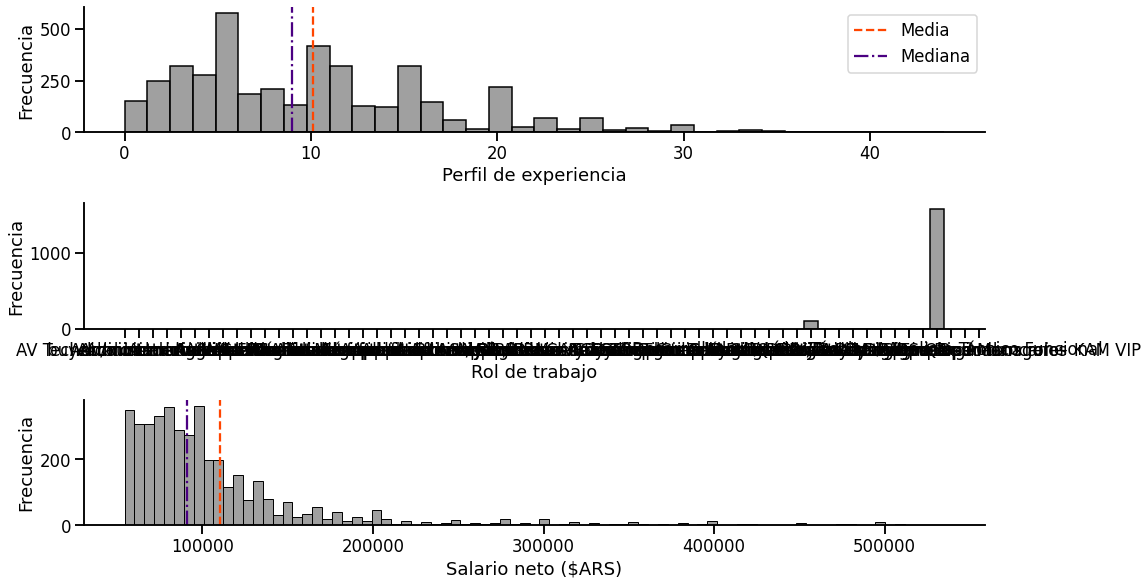

In [32]:
# Visualizamos la frecuencia de las variables

fig, axes = plt.subplots(nrows=3, figsize=(16, 8))
plt.tight_layout() # Este comando hace que no se encimen los gráficos y se puedan ver las etiquetas del eje x. Cabe aclarar  que las etiquetas se agregan automáticamente
g =sns.histplot(experience_filtered, ax=axes[0], color='gray')
axes[0].axvline(experience_filtered.mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(experience_filtered.median(), color='indigo',
            linestyle='-.', label='Mediana')
g.set(xlabel="Perfil de experiencia", ylabel="Frecuencia")

r = sns.histplot(df_interest_roles, ax=axes[1], color='gray')
r.set(xlabel="Rol de trabajo", ylabel="Frecuencia")
plt.tight_layout()

m = sns.histplot(df_final["salary_monthly_NETO"], ax=axes[2], color='gray')
m.set(xlabel="Salario neto ($ARS)", ylabel="Frecuencia")
axes[2].axvline(df_final["salary_monthly_NETO"].mean(), color='orangered',
            linestyle='--', label='Media')
axes[2].axvline(df_final["salary_monthly_NETO"].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()

sns.despine()

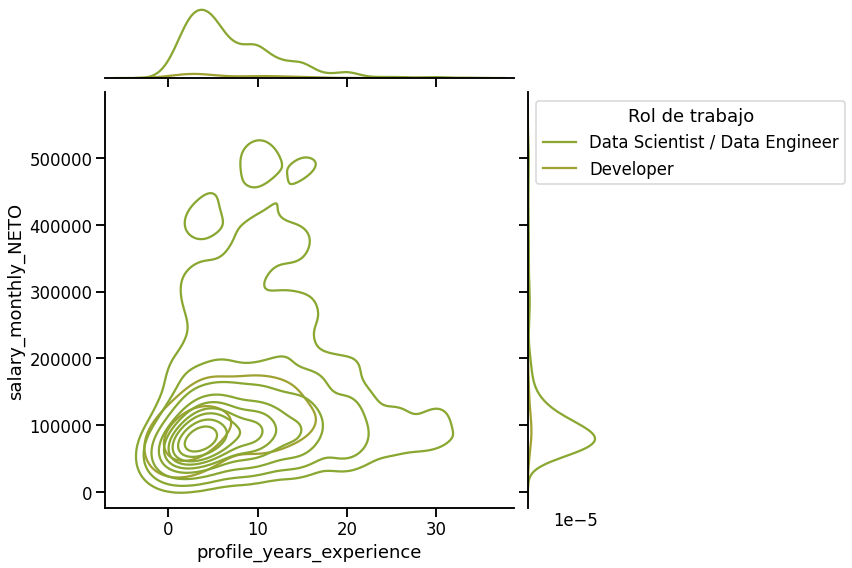

In [33]:
# Visualizamos la distribución de los datos bajo las 3 variables involucradas: Salario neto, Experiencia y Roles de trabajo de interés
ax = sns.jointplot(x=experience_filtered,
                  y=df_final[s_neto], hue=df_interest_roles,
                  kind='kde', height=8, legend=False)
plt.legend(labels = interest_roles, loc = 2, title= "Rol de trabajo")

In [34]:
# Finalmente, calculamos la probabilidad que responde al interrogante inicial de Densidad Conjunta Condicional. 
# Probabilidad de ganar un salario por encima de la media teniendo menos de 2 años de experiencia y solo considerando los Data Scientists.

df_DataSci = df_final['work_role'] == "Data Scientist / Data Engineer"
df_exp_2 = df_final['profile_years_experience'] < 2
# df_plusmedia ya estaba definido en un sección anterior

prob_Exp2_plusmedia_DatSci = len(df_final[df_exp_2 & df_plusmedia & df_DataSci]) / len(df_final[df_final["work_role"] == "Data Scientist / Data Engineer"])
print("La probabilidad de encontrar un programador con menos de 2 años de experiencia, que gane un sueldo mayor a la media, dado que es Data Scientist, es de ", 
      str(prob_Exp2_plusmedia_DatSci*100), " %")

La probabilidad de encontrar un programador con menos de 2 años de experiencia, que gane un sueldo mayor a la media, dado que es Data Scientist, es de  0.9803921568627451  %


Conclusión: Solo el 1 % de los Data Scientist que tienen menos de 2 años de experiencia, ganan por encima de la media.

**Principales conclusiones:** 

La exploración de la base de datos 2020 de la encuesta sysarmy, mostró inicialmente la existencia de valores extremos atípicos, por lo que debío ser procesada bajo diferentes criterios de filtrado. La nueva base de datos revela que el salario promedio de programadores alcanzaba en el año 2020 los 110.284 $ARS. En cuanto a los lenguajes de programación más populares, se destaca "Go" con la mayor proporción de encuestados que cobra salarios por encima de la media.
El análisis de probabilidad conjunta, revela una participación muy alta de hombres de nivel universitario entre los encuestados (59,5%), por sobre cualquier otra combinación de género y nivel de estudio. El análisis de asociación entre las variables de salario bruto y neto muestra una alta correlación (0.952) al eliminar valores atípicos extremadamente altos. Al analizar el salario de los programadores en función del nivel de estudio, se encuentra un aumento esperable del salario a medida que se incrementa el nivel de estudios. Por último, se realizó un análisis restringido solo a programadores dedicados a la ciencia de datos ("Data scientists"). Este revela la importancia de la experiencia para alcanzar salarios altos, ya que solo el 1% de estos encuestados logra salarios por encima de la media, cuando tiene menos de 2 años de experiencia.

**Algunas recomendaciones para futuras encuestas**

Las diferencias entre trabajadores "Part time" y "Full time" son interesantes para evaluar el impacto del tiempo de dedicación laboral sobre el salario. Sin embargo, estas características se encuentran comprendidas en una variable que incorpora otras características no comparables como "Trabajo remoto" o "Freelance". Se recomienda entonces la incorporación de una variable que exclusivamente consulte si un trabajador es "Part time" o "Full time".
Por otra parte, la variable nivel de estudios, incorpora la categoría "Posgrado" a la par de otras como "Doctorado" y "Postdoctorado", lo cual es redundante e implica la separación innecesaria de categorías. Se recomienda eliminar la opción "Posgrado".


# Bibliografía:

- Resultados de la Encuesta de salarios 2020. Link: https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-salarios-2020-2/

- Canasta Básica Total Diciembre 2020. Fuente: INDEC (https://www.indec.gob.ar/ftp/cuadros/sociedad/serie_cba_cbt.xls)

# Apéndice:

Análisis de contratos Part time:
    Dado que en una pregunta consideramos el concepto "Part time" como parte de la respuesta, analizamos la variable Tipo de contrato ("work_contract_type") que contempla "Part time" como una de las opciones de respuesta.

['Full-Time' 'Freelance' 'Part-Time'
 'Tercerizado (trabajo a través de consultora o agencia)'
 'Remoto (empresa de otro país)']


count       302.0
mean      45053.8
std       53500.8
min           9.0
25%       25000.0
50%       37648.5
75%       53825.0
max      836400.0
Name: salary_monthly_NETO, dtype: object

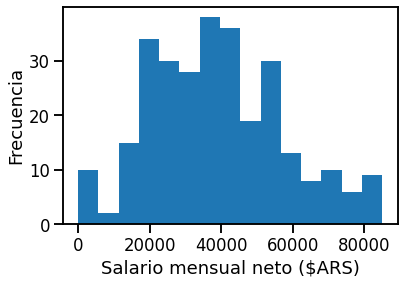

In [35]:
print(df_orig['work_contract_type'].unique())
part_time = df_orig[df_orig['work_contract_type'] == 'Part-Time']
plt.hist(part_time[s_neto], bins=15, range =[0,85000])
plt.xlabel("Salario mensual neto ($ARS)")
plt.ylabel("Frecuencia")
part_time[s_neto].describe().apply(lambda s: '{0:.1f}'.format(s))


Como se esperaba, los programadores Part time, son parte de los trabajadores que cobran salarios por debajo de la media. No obstante, consideramos que no es una fuente de información generalizable a la población, ya que la opción Part time se encuentra comprendida en una pregunta donde las opciones no son comparables en términos de tiempo de dedicación al trabajo. Por ejemplo, Trabajo remoto no es comparable con Part time. Además, los trabajadores Part time representan un porción muy pequeña de los encuestados (302 de 6095). Por ello, consideramos como recomendación, la reformulación de esta pregunta para futuras encuestas, a fin de permitir la comparación entre trabajadores Full time y Part time.